In [26]:
!pip install https://github.com/stefanloock/pyshearlab/archive/master.zip

  Using cached https://github.com/stefanloock/pyshearlab/archive/master.zip
  Preparing metadata (setup.py) ... done


In [27]:
!pip install git+https://github.com/housenli/pyMIND.git

  Cloning https://github.com/housenli/pyMIND.git to /tmp/pip-req-build-smgb56si
  Running command git clone --filter=blob:none --quiet https://github.com/housenli/pyMIND.git /tmp/pip-req-build-smgb56si
  Resolved https://github.com/housenli/pyMIND.git to commit 5bbec9264918db9e2b72f300adb693713d7133ad
  Preparing metadata (setup.py) ... done


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from skimage import data
from skimage import util as skutils
from skimage.color import rgb2gray

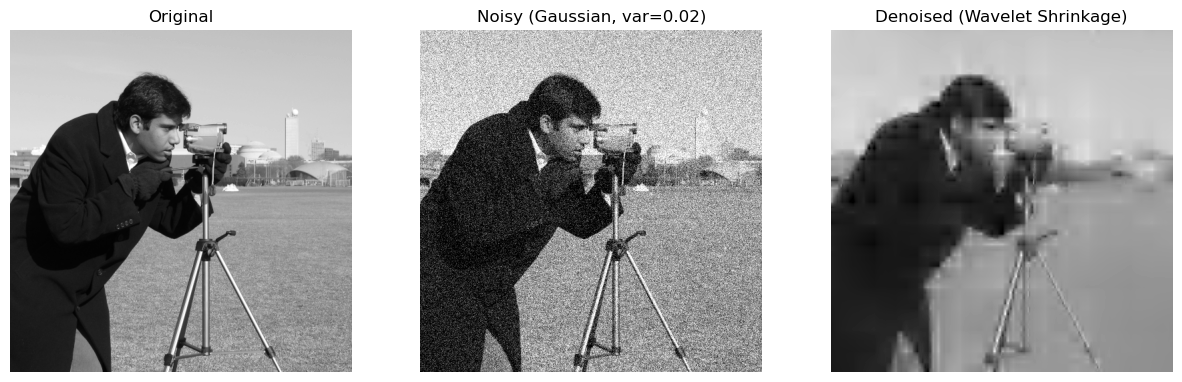

In [2]:
def estimate_sigma_mad(detail_coeffs):
    """
    Estimate noise using the Median Absolute Deviation (MAD)
    of wavelet detail coefficients.
    """
    arr = np.asarray(detail_coeffs).ravel()
    median = np.median(arr)
    mad = np.median(np.abs(arr - median))
    return mad / 0.6745

def wavelet_denoise(noisy_img, wavelet='db1', level=None):
    """
    Wavelet-based image denoising with universal threshold (VisuShrink).
    """
    coeffs = pywt.wavedecn(noisy_img, wavelet=wavelet, level=level)
    # Estimate noise from highest-level detail
    last_detail = coeffs[-1]
    sigma_est_list = [estimate_sigma_mad(last_detail[k]) for k in last_detail.keys()]
    sigma = np.mean(sigma_est_list)
    
    # Universal threshold
    N = noisy_img.size
    threshold = sigma * np.sqrt(2 * np.log(N))
    
    # Threshold detail coefficients
    new_coeffs = [coeffs[0]]  # keep the approx as is
    for detail_dict in coeffs[1:]:
        detail_thresholded = {}
        for k, v in detail_dict.items():
            detail_thresholded[k] = pywt.threshold(v, threshold, mode='soft')
        new_coeffs.append(detail_thresholded)
    
    # Inverse transform
    denoised_img = pywt.waverecn(new_coeffs, wavelet=wavelet)
    return np.clip(denoised_img, 0, 1)

# 1. Load an image
image = data.camera().astype(np.float32) / 255.0

# 2. Add Gaussian noise
noisy_image = skutils.random_noise(image, mode='gaussian', var=0.02)

# 3. Denoise with wavelet shrinkage
denoised_image = wavelet_denoise(noisy_image, wavelet='db2', level=None)

# 4. Visualize
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original")
axes[0].axis("off")

axes[1].imshow(noisy_image, cmap='gray')
axes[1].set_title("Noisy (Gaussian, var=0.02)")
axes[1].axis("off")

axes[2].imshow(denoised_image, cmap='gray')
axes[2].set_title("Denoised (Wavelet Shrinkage)")
axes[2].axis("off")

plt.show()


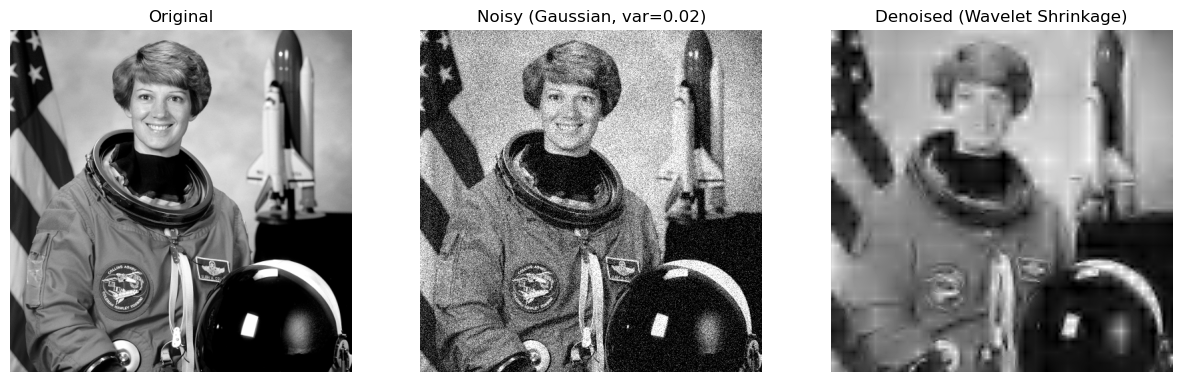

In [3]:
# 1. Load an image
image = data.astronaut().astype(np.float32) / 255.0

# 2. Convert it to grayscale
image = rgb2gray(image)

# 2. Add Gaussian noise
noisy_image = skutils.random_noise(image, mode='gaussian', var=0.02)

# 3. Denoise with wavelet shrinkage
denoised_image = wavelet_denoise(noisy_image, wavelet='coif1', level=None)

# 4. Visualize
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original")
axes[0].axis("off")

axes[1].imshow(noisy_image, cmap='gray')
axes[1].set_title("Noisy (Gaussian, var=0.02)")
axes[1].axis("off")

axes[2].imshow(denoised_image, cmap='gray')
axes[2].set_title("Denoised (Wavelet Shrinkage)")
axes[2].axis("off")

plt.show()


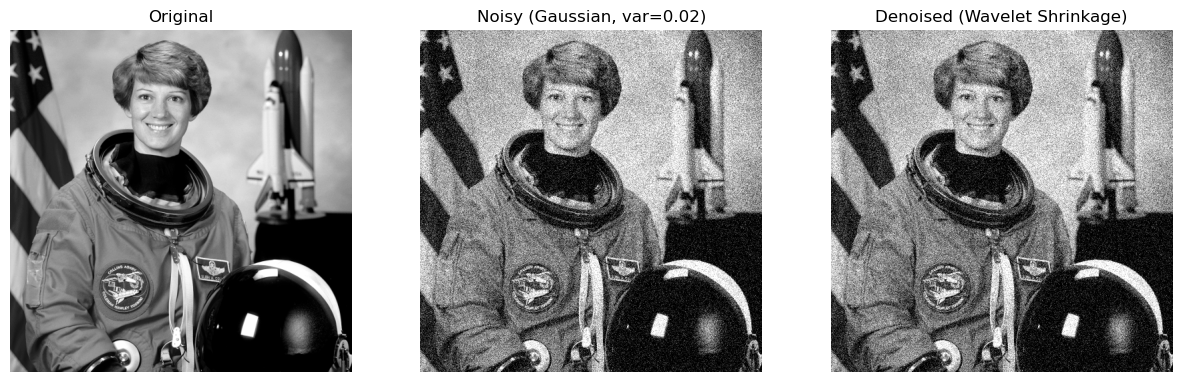

In [4]:
def estimate_sigma_mad(detail_coeffs):
    """
    Estimate noise using the Median Absolute Deviation (MAD)
    of wavelet detail coefficients.
    """
    arr = np.asarray(detail_coeffs).ravel()
    median = np.median(arr)
    mad = np.median(np.abs(arr - median))
    return mad / 0.6745

def wavelet_denoise(noisy_img, wavelet='db1', level=None):
    """
    Wavelet-based image denoising with universal threshold (VisuShrink).
    """
    coeffs = pywt.wavedecn(noisy_img, wavelet=wavelet, level=level)
    # Estimate noise from highest-level detail
    last_detail = coeffs[-1]
    sigma_est_list = [estimate_sigma_mad(last_detail[k]) for k in last_detail.keys()]
    sigma = np.mean(sigma_est_list)
    
    # Universal threshold
    N = noisy_img.size
    threshold = sigma * np.sqrt(2 * np.log(N))
    
    # Threshold detail coefficients
    new_coeffs = [coeffs[0]]  # keep the approx as is
    for detail_dict in coeffs[1:]:
        detail_thresholded = {}
        for k, v in detail_dict.items():
            detail_thresholded[k] = pywt.threshold(v, threshold, mode='soft')
        new_coeffs.append(detail_thresholded)
    
    # Inverse transform
    denoised_img = pywt.waverecn(coeffs, wavelet=wavelet)
    return np.clip(denoised_img, 0, 1)

# 1. Load an image
image = data.astronaut().astype(np.float32) / 255.0

# 2. Convert it to grayscale
image = rgb2gray(image)

# 2. Add Gaussian noise
noisy_image = skutils.random_noise(image, mode='gaussian', var=0.02)

# 3. Denoise with wavelet shrinkage
denoised_image = wavelet_denoise(noisy_image, wavelet='db2', level=None)

# 4. Visualize
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original")
axes[0].axis("off")

axes[1].imshow(noisy_image, cmap='gray')
axes[1].set_title("Noisy (Gaussian, var=0.02)")
axes[1].axis("off")

axes[2].imshow(denoised_image, cmap='gray')
axes[2].set_title("Denoised (Wavelet Shrinkage)")
axes[2].axis("off")

plt.show()


In [10]:
import util
import imageio
import transform 


def dyadic_cube(image, rType='TV', alpha=0.5, snr=30, seed=123):
    np.random.seed(seed)
    X = image
    X /= np.max(X)
    sz = X.shape
    sigma = 1/snr
    Xnoisy = X + sigma * np.random.normal(scale=1, size=sz)

    sgmh = util.stdIm(Xnoisy)

    cube = transform.Cube(sz)
    th = cube.msQuantile(alpha, seed=seed)[0]
    Xrec = cube.multiscale(Xnoisy, sgmh*th, rType=rType)

    return Xrec


def small_cube(image, rType='TV', alpha=0.5, snr=30, seed=123):
    np.random.seed(seed)
    X = image
    X /= np.max(X)
    sz = X.shape
    sigma = 1 / snr
    Xnoisy = X + sigma * np.random.normal(scale=1, size=sz)

    sgmh = util.stdIm(Xnoisy)

    cube = transform.Cube(sz, ctype='scale', param=np.arange(1, 31))
    th = cube.msQuantile(alpha, seed=seed)[0]
    Xrec = cube.multiscale(Xnoisy, sgmh * th, rType=rType)

    return Xrec


def wavelet(image, rType='TV', alpha=0.5, snr=30, seed=123):
    np.random.seed(seed)
    X = image
    X /= np.max(X)
    sz = X.shape
    sigma = 1 / snr
    Xnoisy = X + sigma * np.random.normal(scale=1, size=sz)

    sgmh = util.stdIm(Xnoisy)

    wave = transform.Wavelet(sz)
    th = wave.msQuantile(alpha, seed=seed)[0]
    Xrec = wave.multiscale(Xnoisy, sgmh * th, rType=rType)

    return Xrec


def shearlet(image, rType='TV', alpha=0.5, snr=30, seed=123):
    np.random.seed(seed)
    X = image
    X /= np.max(X)
    sz = X.shape
    sigma = 1 / snr
    Xnoisy = X + sigma * np.random.normal(scale=1, size=sz)

    sgmh = util.stdIm(Xnoisy)

    shear = transform.Shearlet(sz)
    th = shear.msQuantile(alpha, seed=seed)[0]
    Xrec = shear.multiscale(Xnoisy, sgmh * th, rType=rType)

    return Xrec

In [11]:
# 1. Load an image
image = data.astronaut().astype(np.float32) / 255.0

# 2. Convert it to grayscale
image = rgb2gray(image)

# 2. Add Gaussian noise
noisy_image = skutils.random_noise(image, mode='gaussian', var=0.02)

# 3. Denoise with wavelet shrinkage
denoised_image = dyadic_cube(noisy_image)

# 4. Visualize
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original")
axes[0].axis("off")

axes[1].imshow(noisy_image, cmap='gray')
axes[1].set_title("Noisy (Gaussian, var=0.02)")
axes[1].axis("off")

axes[2].imshow(denoised_image, cmap='gray')
axes[2].set_title("Denoised (Wavelet Shrinkage)")
axes[2].axis("off")

plt.show()


Estimate the norm (this might take some time) ...



TypingError: Failed in nopython mode pipeline (step: nopython frontend)
non-precise type pyobject
During: typing of argument at /home/hai/code/stud_assistant/transform.py (740)

File "transform.py", line 740:
    def scale2cube(self, scl, sz):
        <source elided>

    @jit()
    ^ 

This error may have been caused by the following argument(s):
- argument 0: Cannot determine Numba type of <class 'transform.Cube'> 

This error may have been caused by the following argument(s):
- argument 0: Cannot determine Numba type of <class 'transform.Cube'>


Simulate via 5000 draw ...

	 # 500 draws
	 # 1000 draws
	 # 1500 draws
	 # 2000 draws
	 # 2500 draws
	 # 3000 draws
	 # 3500 draws
	 # 4000 draws
	 # 4500 draws
	 # 5000 draws
End of simulation: 145.45137882400013 sec elapsed
Simulation result is stored!

Iteration starts ... (500 in total)

50 th iteration

iterations in "proxTv":  81


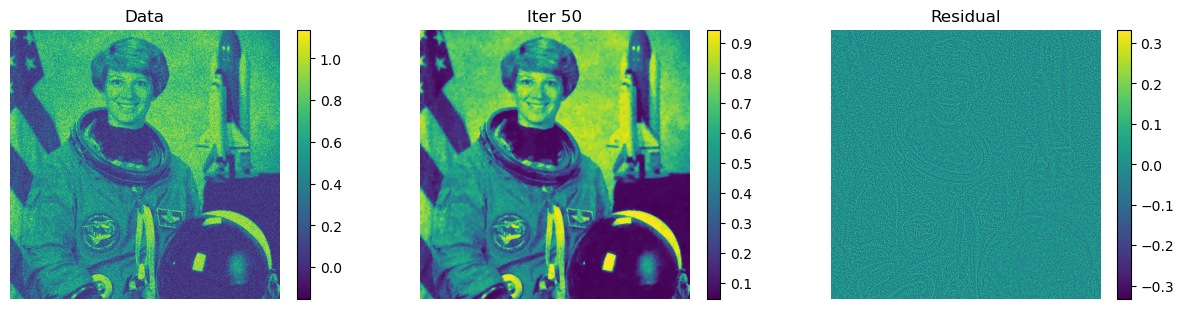

	 changes 0.0013312644638136199 (tol 0.0001), gap -0.15024780574857044 (ctol 0.01)

100 th iteration

iterations in "proxTv":  171


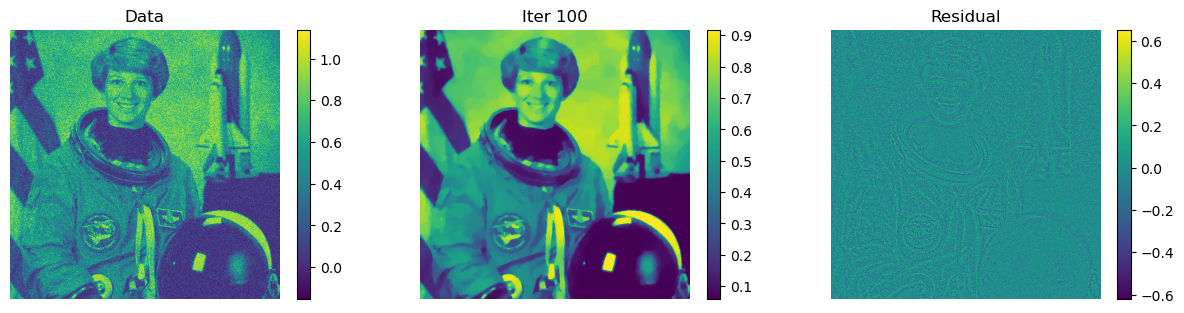

	 changes 0.00043006970581845315 (tol 0.0001), gap 0.0007307791580279943 (ctol 0.01)

150 th iteration

iterations in "proxTv":  187


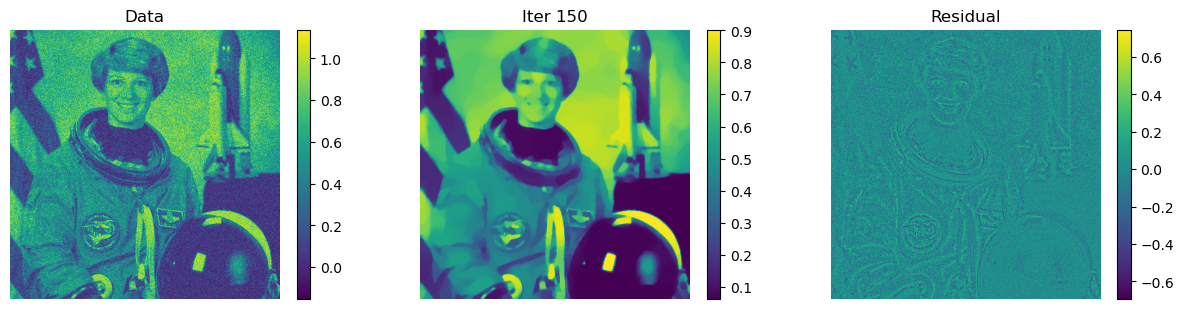

	 changes 0.00027779735193769864 (tol 0.0001), gap 0.0019723236468405236 (ctol 0.01)

200 th iteration

iterations in "proxTv":  272


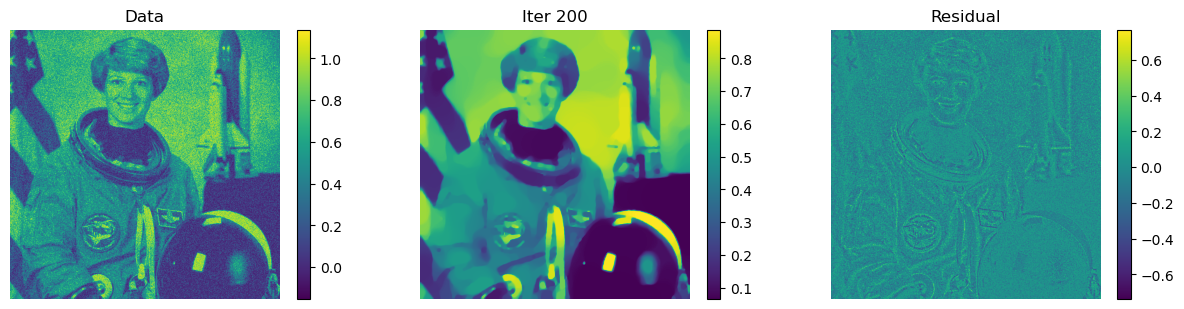

	 changes 0.00020401389369252172 (tol 0.0001), gap 0.0028381730333935096 (ctol 0.01)

250 th iteration

iterations in "proxTv":  324


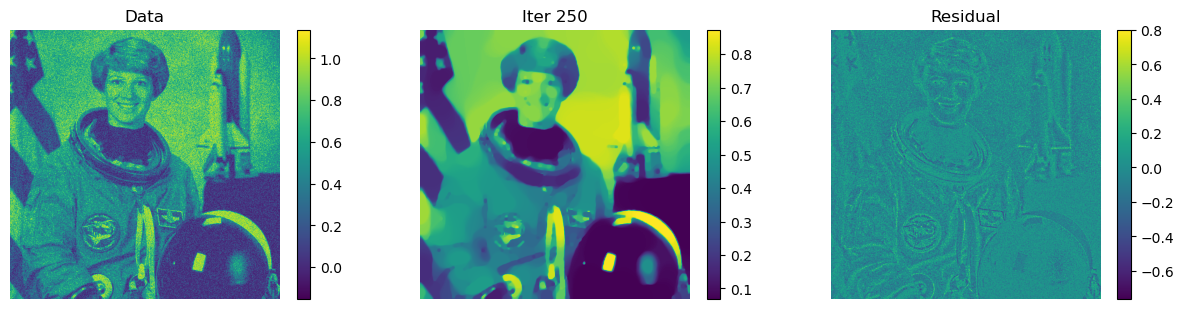

	 changes 0.00016114767541326646 (tol 0.0001), gap 0.00401888904386305 (ctol 0.01)

300 th iteration

iterations in "proxTv":  360


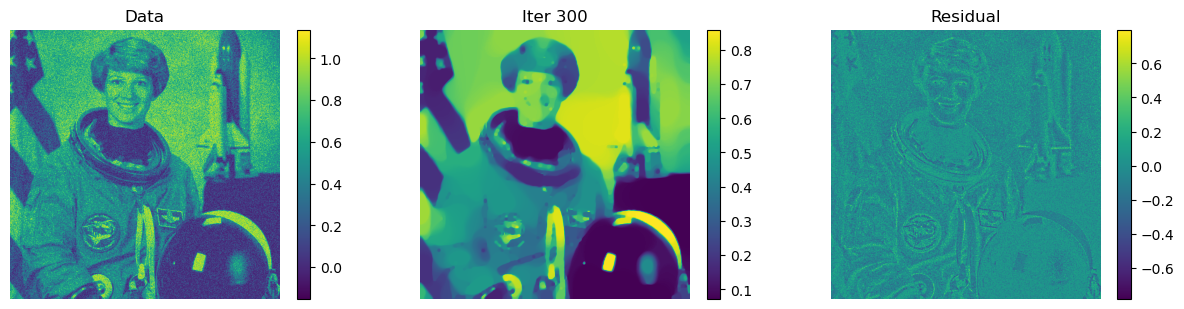

	 changes 0.00013153388270115103 (tol 0.0001), gap 0.00146447517906112 (ctol 0.01)

350 th iteration

iterations in "proxTv":  437


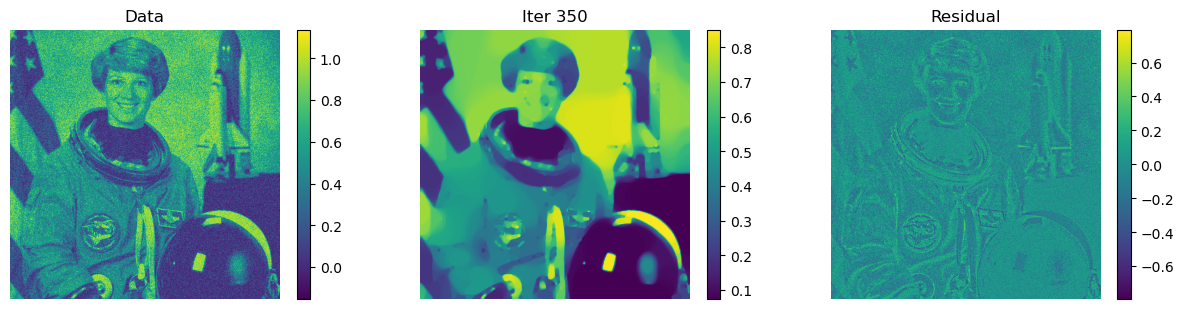

	 changes 0.00010993478871555723 (tol 0.0001), gap 0.002318601473050297 (ctol 0.01)

400 th iteration

iterations in "proxTv":  499


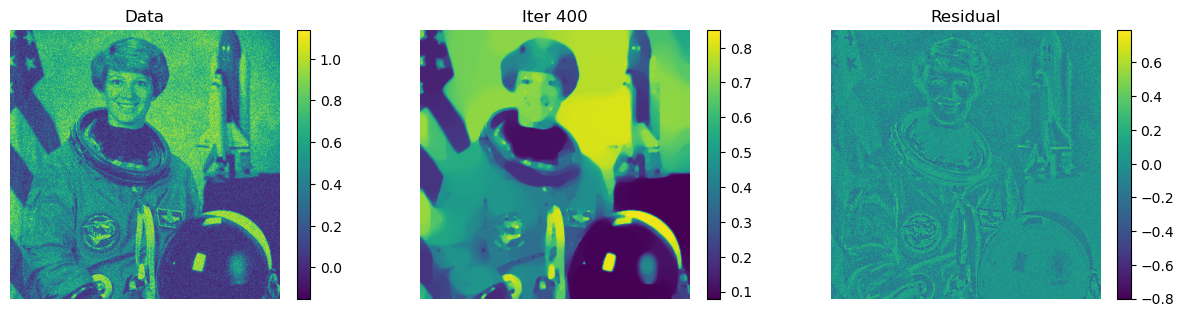

	 changes 9.503609025374071e-05 (tol 0.0001), gap 0.002196769284697586 (ctol 0.01)

Stop at 400 iterations and 2752.1057833960003 sec elapsed!



ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

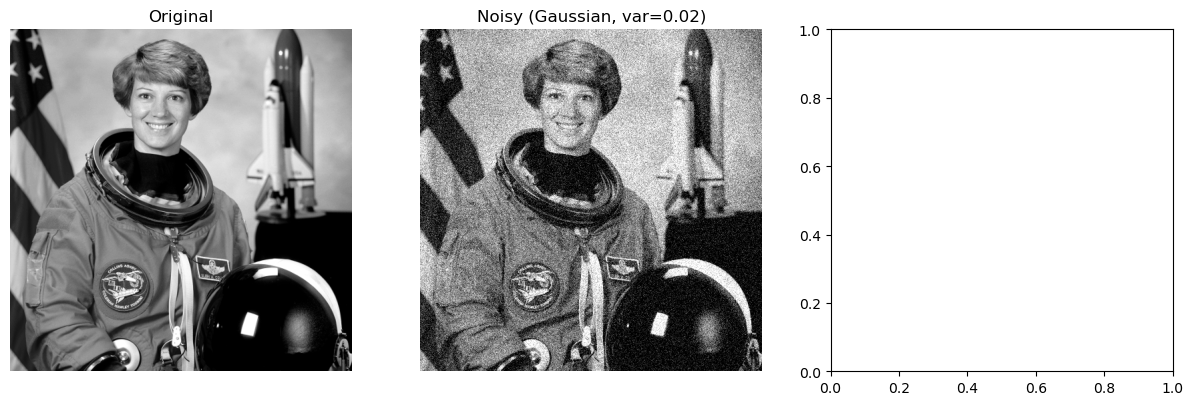

In [13]:
# 1. Load an image
image = data.astronaut().astype(np.float32) / 255.0

# 2. Convert it to grayscale
image = rgb2gray(image)

# 2. Add Gaussian noise
noisy_image = skutils.random_noise(image, mode='gaussian', var=0.02)

# 3. Denoise with wavelet shrinkage
denoised_image = wavelet(noisy_image)

# 4. Visualize
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original")
axes[0].axis("off")

axes[1].imshow(noisy_image, cmap='gray')
axes[1].set_title("Noisy (Gaussian, var=0.02)")
axes[1].axis("off")

axes[2].imshow(denoised_image, cmap='gray')
axes[2].set_title("Denoised (Wavelet Shrinkage)")
axes[2].axis("off")

plt.show()


In [ ]:
# 1. Load an image
image = data.astronaut().astype(np.float32) / 255.0

# 2. Convert it to grayscale
image = rgb2gray(image)

# 2. Add Gaussian noise
noisy_image = skutils.random_noise(image, mode='gaussian', var=0.02)

# 3. Denoise with wavelet shrinkage
denoised_image = shearlet(noisy_image)

# 4. Visualize
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original")
axes[0].axis("off")

axes[1].imshow(noisy_image, cmap='gray')
axes[1].set_title("Noisy (Gaussian, var=0.02)")
axes[1].axis("off")

axes[2].imshow(denoised_image, cmap='gray')
axes[2].set_title("Denoised (Wavelet Shrinkage)")
axes[2].axis("off")

plt.show()


/home/hai/miniconda3/lib/python3.12/site-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


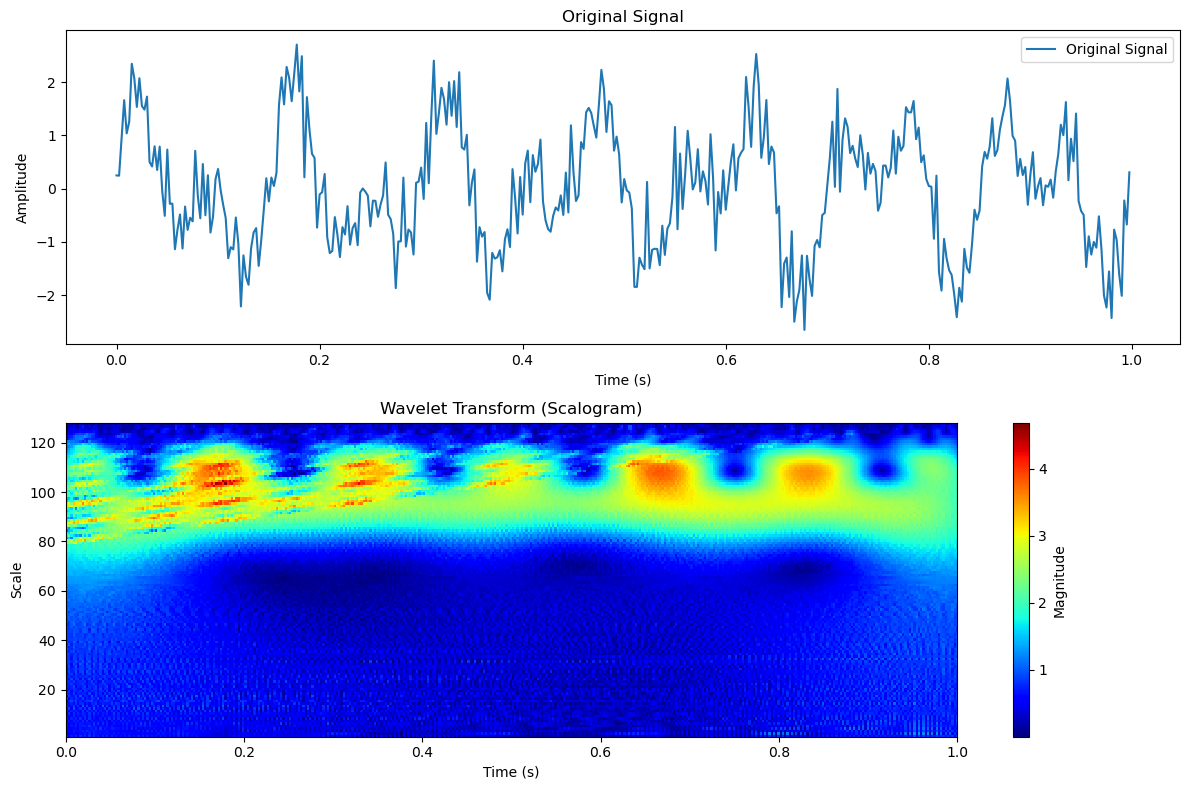

In [1]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Generate synthetic signal
np.random.seed(42)
t = np.linspace(0, 1, 400, endpoint=False)
signal = np.sin(2 * np.pi * 7 * t) + np.sin(2 * np.pi * 13 * t) + np.random.normal(0, 0.5, t.shape)

# Perform Continuous Wavelet Transform (CWT)
wavelet = 'cmor'  # Complex Morlet wavelet
scales = np.arange(1, 128)
coefficients, frequencies = pywt.cwt(signal, scales, wavelet, sampling_period=t[1] - t[0])

# Plot the signal and wavelet transform
plt.figure(figsize=(12, 8))

# Original Signal
plt.subplot(2, 1, 1)
plt.plot(t, signal, label='Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original Signal')
plt.legend()

# Wavelet Transform Coefficients (Scalogram)
plt.subplot(2, 1, 2)
plt.imshow(
    np.abs(coefficients),
    extent=[0, 1, 1, 128],
    cmap='jet',
    aspect='auto',
    interpolation='nearest'
)
plt.colorbar(label='Magnitude')
plt.xlabel('Time (s)')
plt.ylabel('Scale')
plt.title('Wavelet Transform (Scalogram)')

plt.tight_layout()
plt.show()
